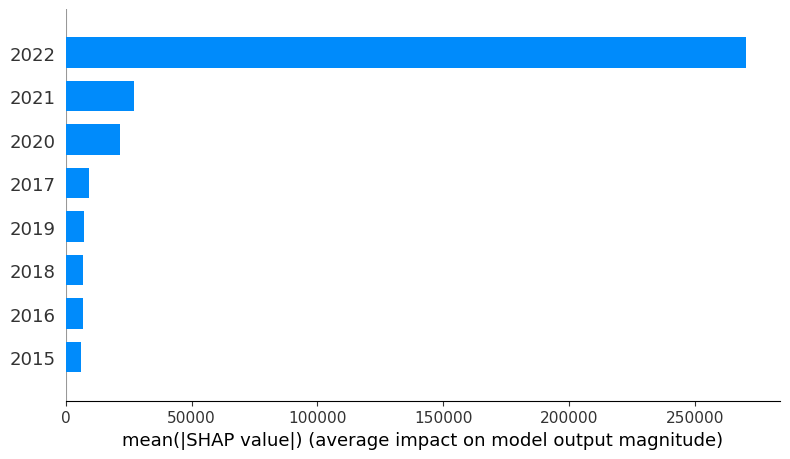

<Figure size 640x480 with 0 Axes>

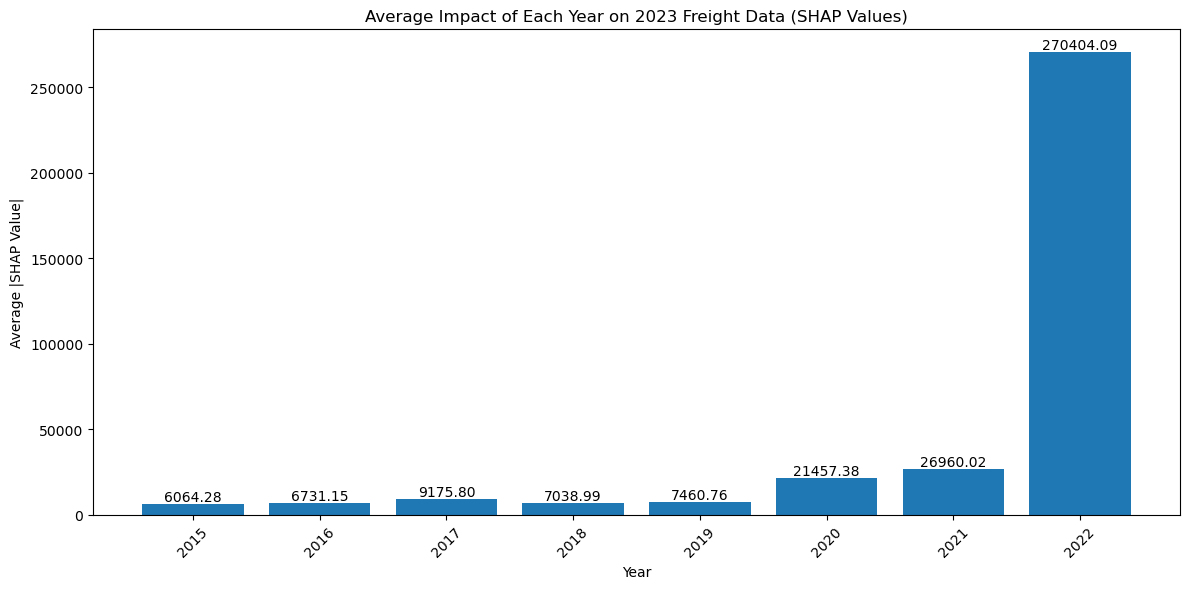

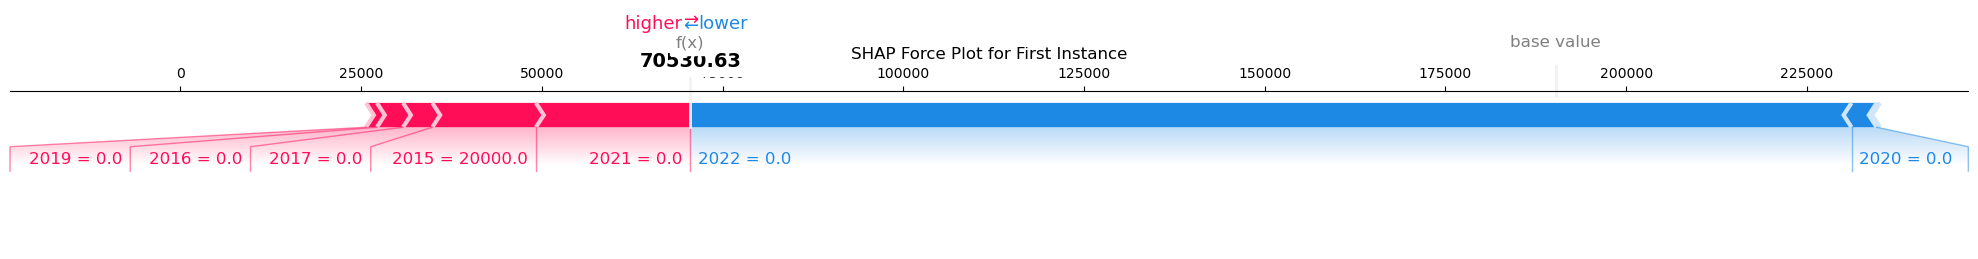

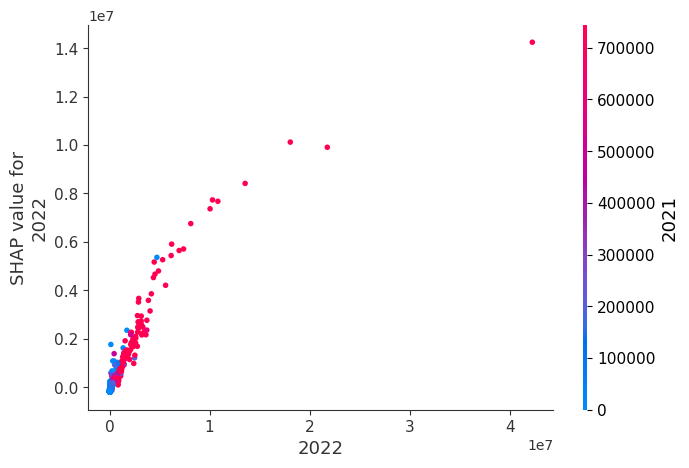

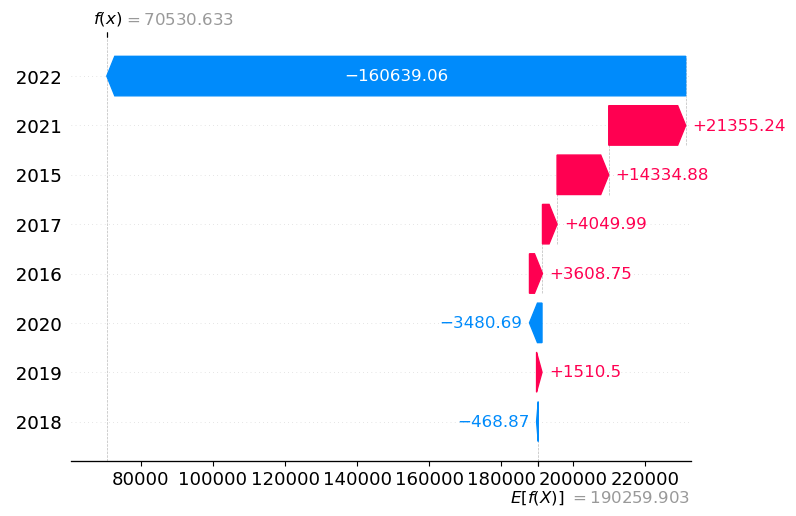

Average SHAP Values (absolute):
2015: 6064.2816
2016: 6731.1535
2017: 9175.7975
2018: 7038.9871
2019: 7460.7592
2020: 21457.3830
2021: 26960.0190
2022: 270404.0861


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestRegressor

def load_data(file_path):
    return pd.read_csv(file_path)

def prepare_data(df):
    X = df.drop('2023', axis=1)
    y = df['2023']
    return X, y

def train_model(X, y):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    return model

def calculate_shap_values(model, X):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    return explainer, shap_values

def plot_shap_summary(shap_values, X):
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X, plot_type="bar")
    plt.tight_layout()
    plt.show()

def plot_shap_values_bar(shap_values, X):
    avg_shap_values = np.abs(shap_values).mean(axis=0)
    years = X.columns

    plt.figure(figsize=(12, 6))
    plt.bar(years, avg_shap_values)
    plt.title('Average Impact of Each Year on 2023 Freight Data (SHAP Values)')
    plt.xlabel('Year')
    plt.ylabel('Average |SHAP Value|')
    plt.xticks(rotation=45)
    for i, v in enumerate(avg_shap_values):
        plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

def plot_shap_waterfall(explainer, shap_values, X):
    shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0], X.iloc[0])

def plot_shap_force(explainer, shap_values, X):
    shap.force_plot(explainer.expected_value[0], shap_values[0], X.iloc[0], matplotlib=True, show=False)
    plt.title('SHAP Force Plot for First Instance')
    plt.tight_layout()
    plt.show()

def plot_shap_dependence(shap_values, X, feature):
    shap.dependence_plot(feature, shap_values, X)

def main():
    df = load_data(r"D:\NATPAC-Alosh\Datasets\yearly_data.csv")

    X, y = prepare_data(df)

    model = train_model(X, y)

    explainer, shap_values = calculate_shap_values(model, X)

    plot_shap_summary(shap_values, X)

    plot_shap_values_bar(shap_values, X)

    plot_shap_force(explainer, shap_values, X)

    plot_shap_dependence(shap_values, X, '2022')

    plot_shap_waterfall(explainer, shap_values, X)

    print("Average SHAP Values (absolute):")
    for year, value in zip(X.columns, np.abs(shap_values).mean(axis=0)):
        print(f"{year}: {value:.4f}")

if __name__ == "__main__":
    main()